In [4]:
import pandas as pd

# Load the uploaded CSV file
data_birdstrikes = pd.read_csv('/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/Experiments_Folder/Old-VizRec/movies/all_experiments_Movies.csv')
data_birdstrikes['Algorithm'].replace({'ActorCritic': 'Actor-Critic', 'QLearn': 'Q-Learning'}, inplace=True)


In [5]:
import matplotlib.pyplot as plt

def create_plot(average_accuracies, svg_file_path, openended):

    # Updated data based on the new results
    strategies = [
  'Greedy',
  'Q-Learning',
  'Bayesian',
  'Momentum',
  'HMM']

    values = average_accuracies.loc[strategies].values.tolist()


    # X-axis percentages and labels
    x_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']
    markers = ['s', 'o', '+', 'H', '^']

    plt.figure(figsize=(8, 6))

    # Plotting the data
    for i, strategy in enumerate(strategies):
        plt.plot(values[i], marker=markers[i % len(markers)], label=strategy)
    #make lines and symbols bigger
    plt.setp(plt.gca().get_lines(), markersize=20)

    plt.xlabel('Percentage of data used for training', fontsize=15)
    plt.ylabel('Accuracy (%)', fontsize=15)
    plt.xticks(range(len(x_labels)), x_labels, fontsize=13)  # Set custom x-axis ticks and labels with increased font size
    # plt.yticks(fontsize=13)  # Increase Y-axis tick font size
    # Set y-axis limits from 0 to 1 and y-ticks at 0.1 intervals
    plt.ylim(0, 1)
    plt.yticks([i/10 for i in range(0, 11)], fontsize=13)  # Set Y-axis ticks at 0.1 intervals

    plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5, fontsize=25)

    plt.grid(axis='y')
    plt.savefig(svg_file_path, format='png', bbox_inches='tight')




In [10]:
#get aaverage accuracies when threshold is 0.8
data_focused=data_birdstrikes[data_birdstrikes['Threshold']==0.5]
#overall threshold accuracy
threshold_accuracy = data_focused.groupby(['Algorithm']).Accuracy.mean()
threshold_accuracy


Algorithm
Actor-Critic    0.599623
Bayesian        0.590078
Greedy          0.481662
HMM             0.545169
Momentum        0.368939
Q-Learning      0.649176
Random          0.249658
Reinforce       0.627809
SARSA           0.660565
WSLS            0.254498
Name: Accuracy, dtype: float64

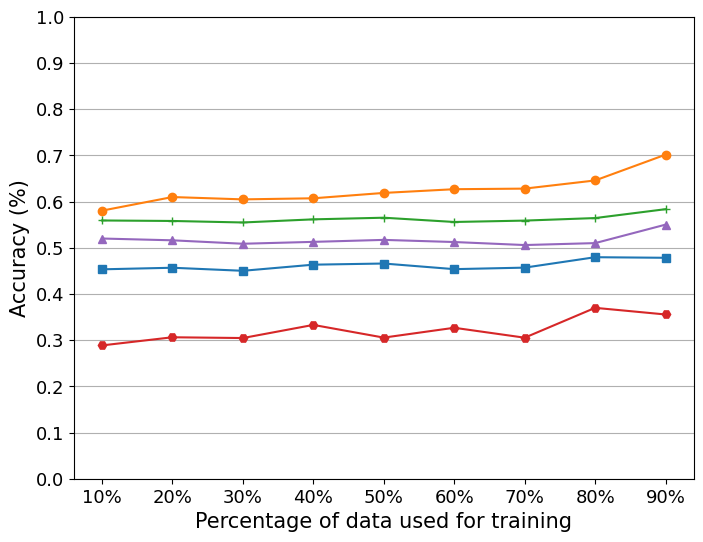

In [23]:
data_open=data_birdstrikes[data_birdstrikes['Openended']=='Openended']
average_accuracies_open = data_open.groupby(['Algorithm', 'Threshold']).Accuracy.mean().unstack()
average_accuracies_open.drop(columns=[0.05], inplace=True)
# Display the calculated averages
average_accuracies_open
create_plot(average_accuracies_open, 'birdstrikes-open-best.png', 'Openended')

In [24]:
file_path = 'all_experiments_Movies.csv'
data_movies = pd.read_csv(file_path)
data_movies['Algorithm'].replace({'ActorCritic': 'Actor-Critic', 'QLearn': 'Q-Learning'}, inplace=True)


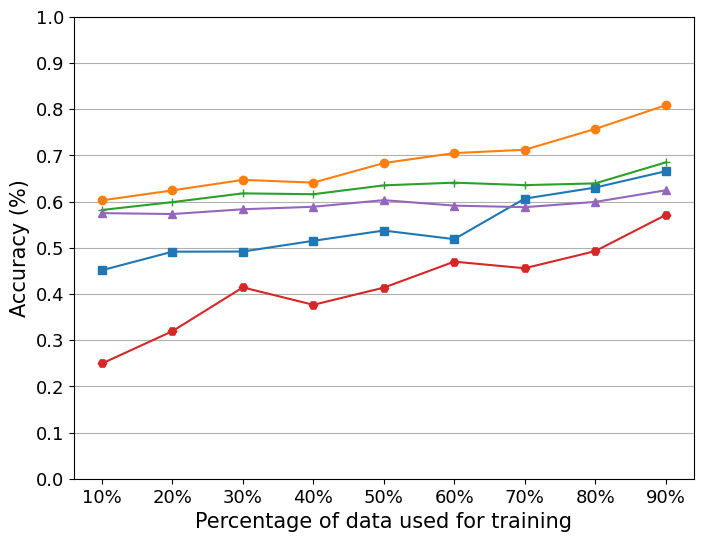

In [25]:
data_focused=data_movies[data_movies['Openended']=='Focused']
average_accuracies_focused = data_focused.groupby(['Algorithm', 'Threshold']).Accuracy.mean().unstack()
average_accuracies_focused.drop(columns=[0.05], inplace=True)
create_plot(average_accuracies_focused, 'movies-focused-best.png', 'Focused')

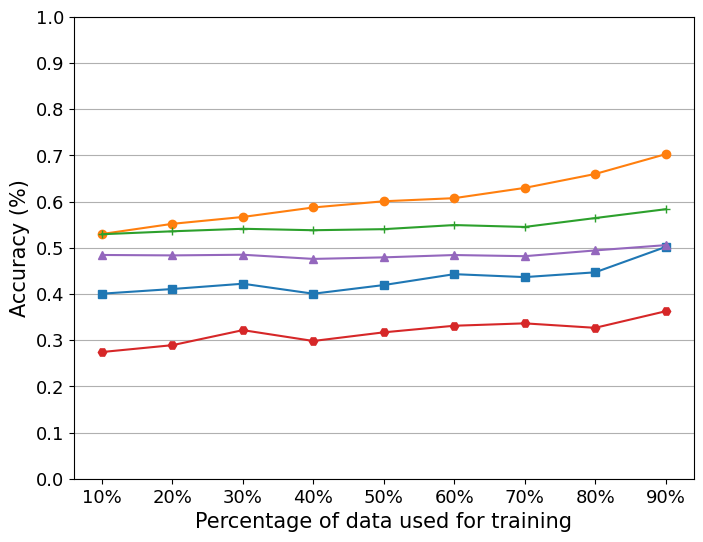

In [26]:
data_open=data_movies[data_movies['Openended']=='Openended']
average_accuracies_open = data_open.groupby(['Algorithm', 'Threshold']).Accuracy.mean().unstack()
average_accuracies_open.drop(columns=[0.05], inplace=True)
create_plot(average_accuracies_open, 'movies-open-best.png', 'Openended')